In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM
--------------


In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# can delete later, just playing around with using 'inspector'
# where are these table names coming from?
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# reflect the existing database into a new model
Base = automap_base()
# reflect the tables into ORM class
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis
-------

In [11]:
#dinking around, can delete later
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])
    
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
#dinking around,  can delete later
engine.execute('select * from station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [13]:
#dinking around, can delete later
engine.execute('select * from measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [14]:
#dinking around, can delete later
session.query(func.count(Measurement.station)).all()
session.query(Measurement.date).order_by(Measurement.date).first()
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
today = date.today()
query_date = today - dt.timedelta(days=365)
print("Query Date: ", query_date)
session.query(func.sum(Measurement.prcp)).group_by(Measurement.station).all()
sel = [Measurement.station,
       func.sum(Measurement.prcp)]
#precip_totals = session.query(*sel).\
    #filter(func.strftime("%Y", Measurement.date) == '2013').\
    #group_by(Measurement.station).\
    #order_by(Measurement.station).all()
#precip_totals
precip_totals = session.query(*sel).\
    filter(Measurement.date == query_date).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
precip_totals
print("Today's Date: ", today)

Query Date:  2019-02-14
Today's Date:  2020-02-14


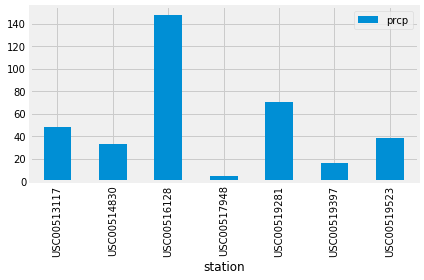

In [34]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Query to find the last date in the Measurements table
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


sel = [Measurement.station,
       func.sum(Measurement.prcp)]
precip_totals = session.query(*sel).\
    filter(Measurement.date >= '2016-08-23').\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()
precip_totals

precip_df = pd.DataFrame(precip_totals, columns = ['station', 'prcp'])
precip_df.set_index('station', inplace=True)
precip_df.plot.bar()
plt.tight_layout()
plt.show()

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

In [17]:
 # Use Pandas to calcualte the summary statistics for the precipitation data

In [18]:
# Design a query to show how many stations are available in this dataset?

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

In [20]:
 # Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [22]:
 # This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

In [24]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# Optional Challenge Assignment
------

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [27]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

In [28]:
 # Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

In [29]:
# Plot the daily normals as an area plot with `stacked=False`